In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [4]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [6]:
# 108 entradas, 1 saída = 55
ann_census = MLPClassifier(max_iter=1000, verbose=True, tol=0.000010, solver='adam', activation='relu', hidden_layer_sizes=(55, 55))

In [7]:
ann_census.fit(X_census_treinamento, Y_census_treinamento)

Iteration 1, loss = 0.40080859
Iteration 2, loss = 0.32998667
Iteration 3, loss = 0.31798291
Iteration 4, loss = 0.30985294
Iteration 5, loss = 0.30414784
Iteration 6, loss = 0.29941250
Iteration 7, loss = 0.29673751
Iteration 8, loss = 0.29438329
Iteration 9, loss = 0.29192136
Iteration 10, loss = 0.28907650
Iteration 11, loss = 0.28667329
Iteration 12, loss = 0.28569788
Iteration 13, loss = 0.28274518
Iteration 14, loss = 0.28170699
Iteration 15, loss = 0.27990442
Iteration 16, loss = 0.27787420
Iteration 17, loss = 0.27591130
Iteration 18, loss = 0.27492017
Iteration 19, loss = 0.27362792
Iteration 20, loss = 0.27167364
Iteration 21, loss = 0.27054538
Iteration 22, loss = 0.26842054
Iteration 23, loss = 0.26697504
Iteration 24, loss = 0.26578921
Iteration 25, loss = 0.26419336
Iteration 26, loss = 0.26290144
Iteration 27, loss = 0.26132208
Iteration 28, loss = 0.26056043
Iteration 29, loss = 0.25922786
Iteration 30, loss = 0.25798685
Iteration 31, loss = 0.25641675
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [8]:
previsoes = ann_census.predict(X_census_teste)

In [9]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [10]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [11]:
from sklearn.metrics import accuracy_score, classification_report

In [12]:
accuracy_score(Y_census_teste, previsoes)

0.8229273285568065

0.8229273285568065

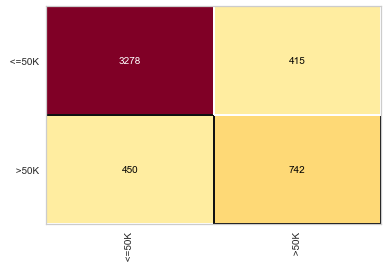

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(ann_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [14]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      3693
        >50K       0.64      0.62      0.63      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.76      0.76      4885
weighted avg       0.82      0.82      0.82      4885

